In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
from ds2s_OV_x0 import ds2s_OV_x0

In [3]:
def plot_pattern(ax, model, ni, nf):
    ax.set_xlabel("Time")
    ax.set_ylabel("Location of Vehicles")
    ax.set_title(
        "L={:3.1f}, K={}, n0={}, x0={:2.1f}, v0={:2.1f}, dt={:2.1f}, dx={:2.1f}"
        .format(model.L, model.K, model.n_0, model.x_0, model.v_0, model.dt, model.dx)
    )
    ax.set_xlim((0, 100))
    ax.set_ylim((0, 10))
    x = np.array([[j for i in range(model.K)] for j in range(ni, nf+1)]) \
        .flatten()
    y = model.x[ni:nf+1, :model.K].flatten()
    ax.scatter(x, y, s=1)


def plot_flow(ax, model, ni, nf):
    ax.set_xlabel("Time")
    ax.set_ylabel("Flow")
    ax.set_xlim((ni, nf))
    ax.set_ylim((0, 1.0))
    ax.set_title(
        "L={:3.1f}, K={}, n0={}, x0={:2.1f}, v0={:2.1f}, dt={:2.1f}, dx={:2.1f}"
        .format(model.L, model.K, model.n_0, model.x_0, model.v_0, model.dt, model.dx)
    )
    x = np.array([i for i in range(nf - ni + 1)])
    y = np.array([model.flow(0, i) for i in range(ni, nf + 1)])
    ax.plot(x, y)

def plot_fundamental(ax, model, density, flow):
    ax.set_xlabel("Density")
    ax.set_ylabel("Flow")
    ax.set_xlim((0, 1.0))
    ax.set_ylim((0, 1.0))
    ax.set_title(
        "L={:3.1f}, K={}, n0={}, x0={:2.1f}, v0={:2.1f}, dt={:2.1f}, dx={:2.1f}"
        .format(model.L, model.K, model.n_0, model.x_0, model.v_0, model.dt, model.dx)
    )
    ax.scatter(density, flow, s=3)

In [5]:
L = 10.0
n_0 = 5
x_0 = 0.1
v_0 = 0.7
dt = 0.1
dx = 1.0

K =  100

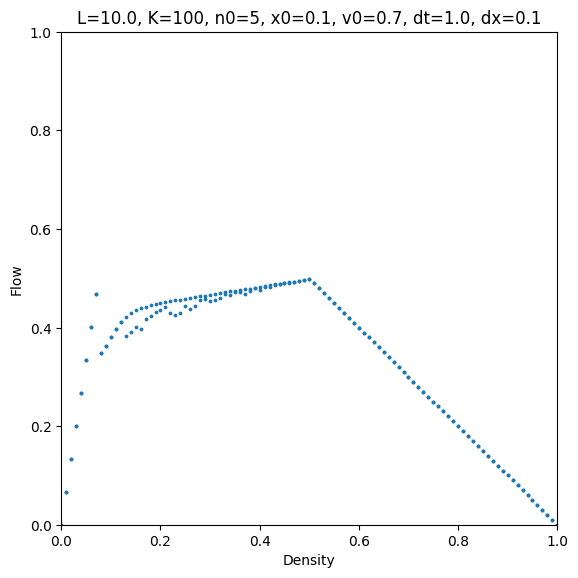

In [9]:
fig = plt.figure(figsize=(6.4, 6.4))
ax = fig.add_subplot(1, 1, 1)

density = []
flow = []

for K in range(101):
	sys.stdout.write("\rK = {:4d}".format(K))
	sys.stdout.flush()
	x_init = np.array(sorted(random.sample([0.1 * i for i in range(100)], K)))
	model = ds2s_OV_x0(
		L=10.0,
		K=K,
		n_0=5,
		x_0=0.1,
		v_0=0.7,
		dt=1.0,
		dx=0.1,
		x_init=x_init,
		n_max=1010
	)
	model.simulate()
	density.append(model.density())
	flow.append(model.flow(800, 1000))

for K in range(101):
	sys.stdout.write("\rK = {:4d}".format(K))
	sys.stdout.flush()
	x_init = np.array([0.1 * i for i in range(K)])
	model = ds2s_OV_x0(
		L=10.0,
		K=K,
		n_0=5,
		x_0=0.1,
		v_0=0.7,
		dt=1.0,
		dx=0.1,
		x_init=x_init,
		n_max=1010
	)
	model.simulate()
	density.append(model.density())
	flow.append(model.flow(800, 1000))

plot_fundamental(ax, model, density, flow)